<a href="https://colab.research.google.com/github/abhishek0478/ML-project---Regression/blob/main/Bike_sharing_demand_analysis1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from os import pathconf_names
path = '/content/drive/MyDrive/SeoulBikeData.csv'

In [3]:
df = pd.read_csv(path,encoding = 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings ('ignore')

In [5]:
df.shape

(8760, 14)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [7]:
df.isna().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.duplicated().sum()


0

In [9]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

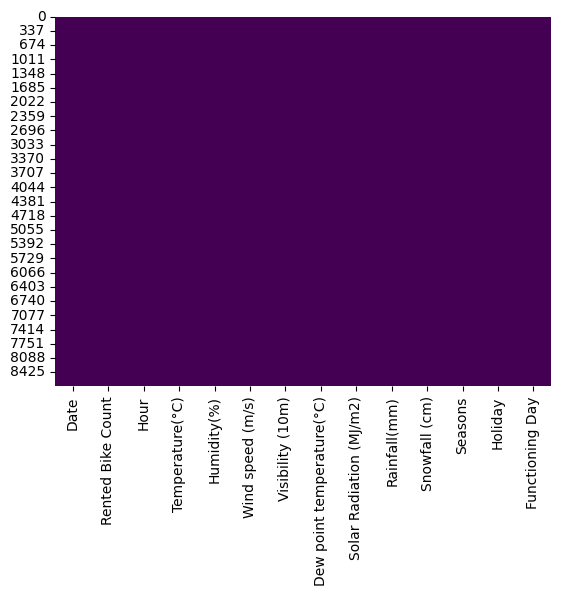

In [10]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [11]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [13]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [16]:
df = df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 




##**Data Wrangling**

In [18]:
#Changign the date column into three day, month , year.
df[['day', 'month', 'year']] = df['Date'].str.split('/', expand=True)


In [19]:
df['Date'] = pd.to_datetime(df['Date'])


In [20]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [21]:
df['weekdays_weekend'] = df['day'].apply(lambda x: 1 if x =='Saturday' or x =='Sunday' else 0 )

In [22]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [23]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [24]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

One hot encoding for seasons column

In [25]:
df = df.drop(columns = ['Date','year','day'],axis = 1)

In [26]:
# change uint64 column into category column
cols = ['Hour','month','weekdays_weekend']
for col in cols:
  df[col] = df[col].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

##**EDA**

<Axes: xlabel='month', ylabel='Rented_Bike_Count'>

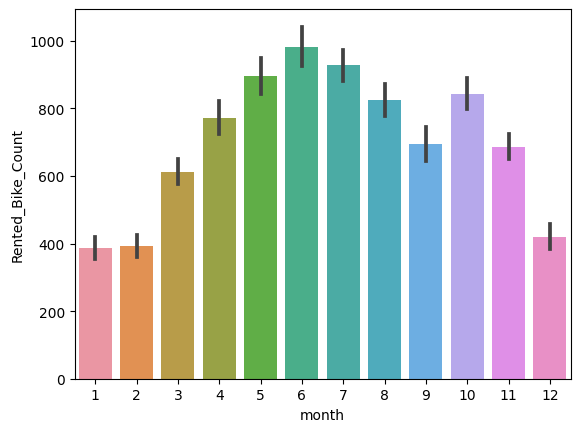

In [28]:
sns.barplot(x='month',y='Rented_Bike_Count',data = df)

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

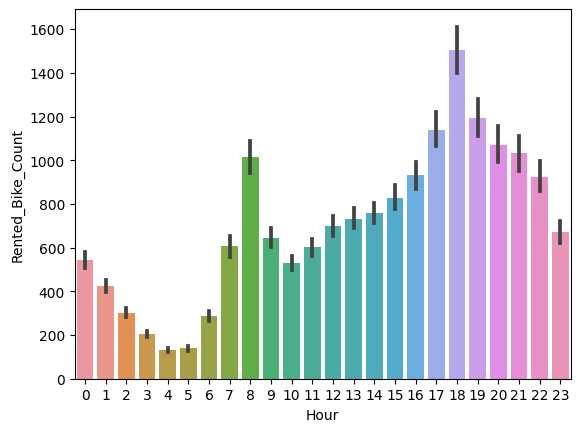

In [29]:
sns.barplot(x='Hour',y='Rented_Bike_Count',data = df)

Text(0.5, 1.0, 'Relationship between Rented_Bike_Count and Season')

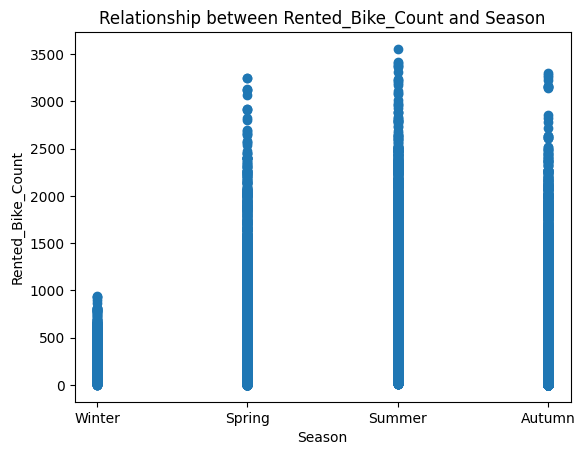

In [30]:
plt.scatter(df['Seasons'], df['Rented_Bike_Count'])
plt.xlabel('Season')
plt.ylabel('Rented_Bike_Count')
plt.title('Relationship between Rented_Bike_Count and Season')


[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

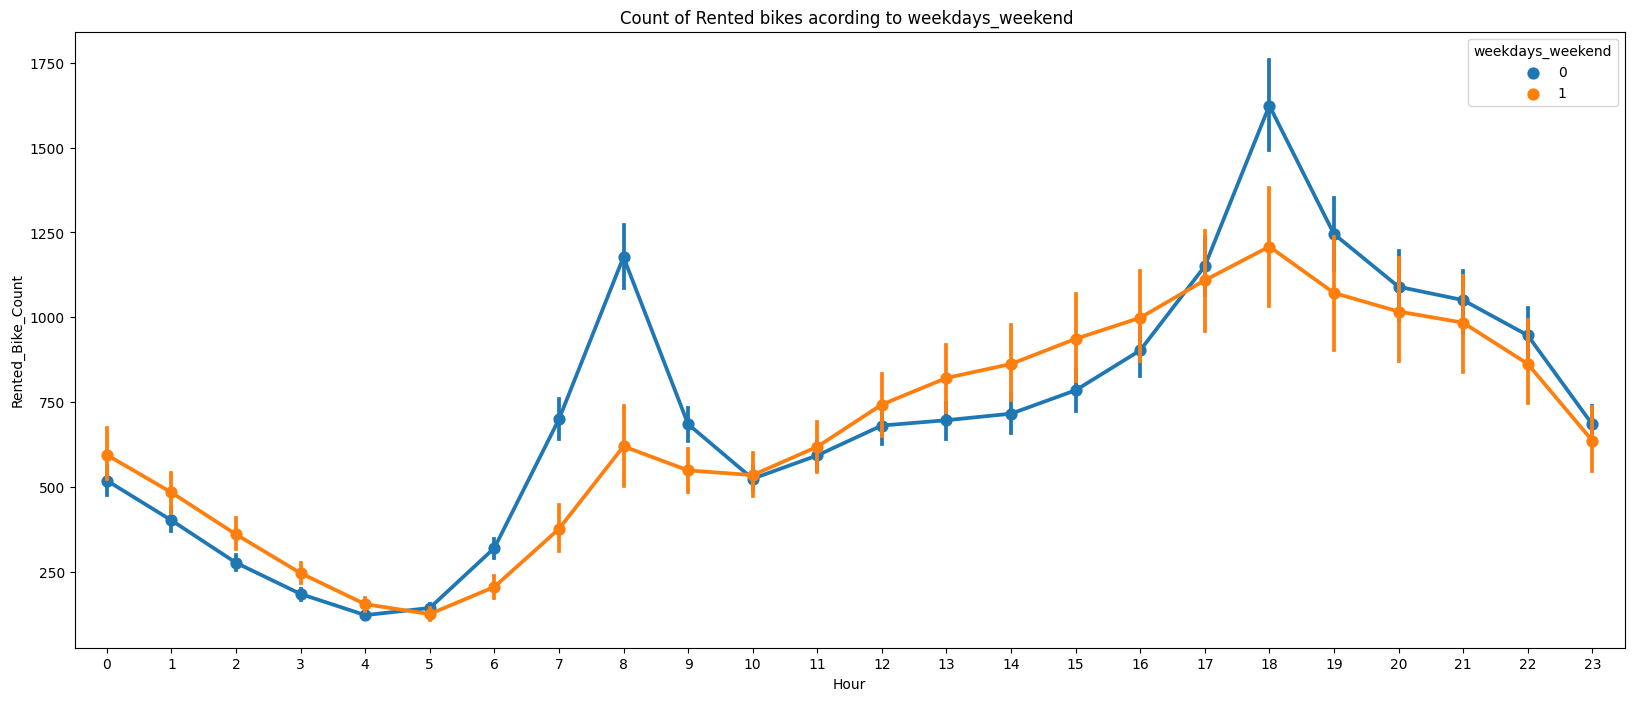

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

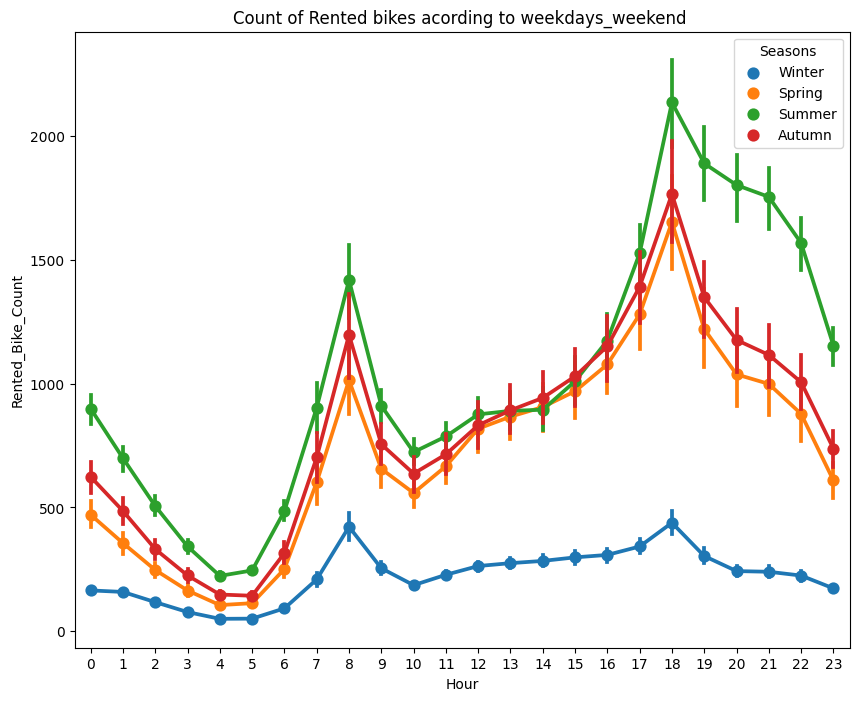

In [32]:
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

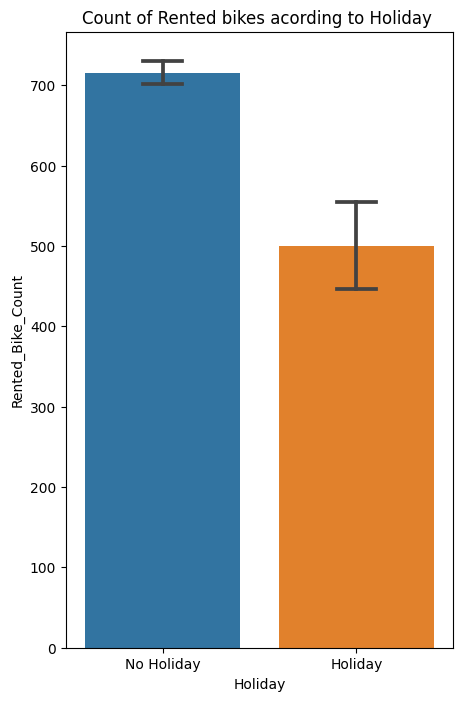

In [33]:
fig,ax=plt.subplots(figsize=(5,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

<Axes: xlabel='Temperature'>

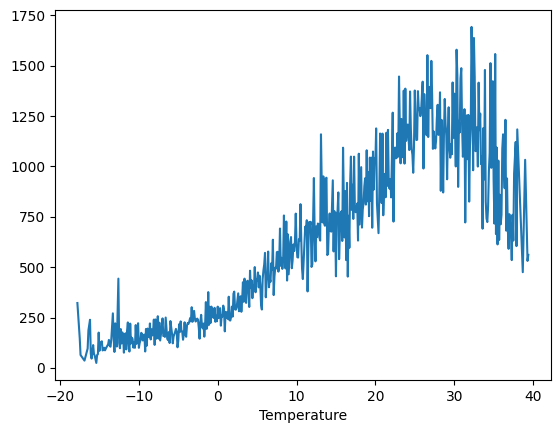

In [34]:
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

In [35]:
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [36]:
# missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
# plt.figure(figsize=(16,5))
# ax = sns.pointplot('index',0,data= missing)
# plt.xticks(rotation =90,fontsize =7)
# plt.title("Percentage of Missing values")
# plt.ylabel("PERCENTAGE")
# plt.show()

##Analysis of numerical data

In [37]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

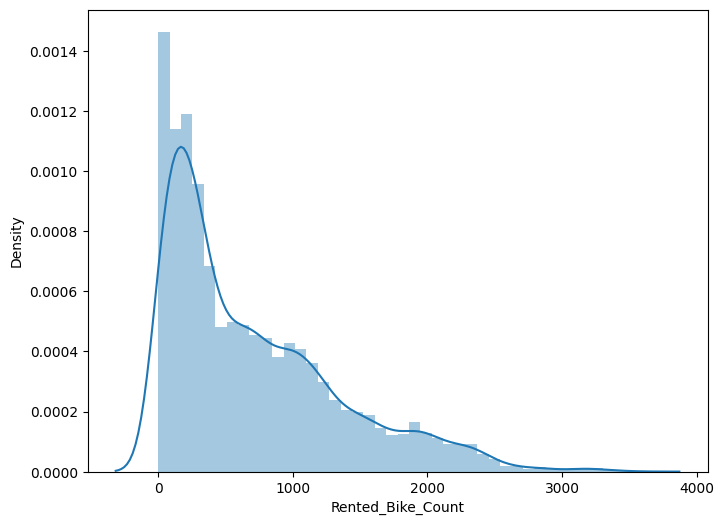

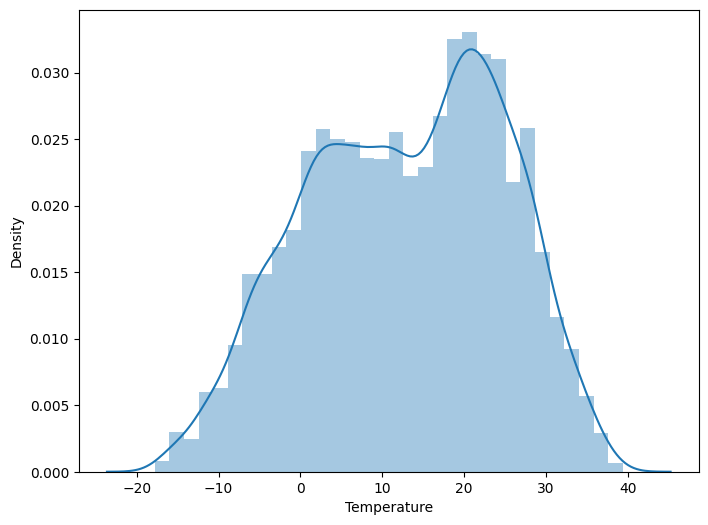

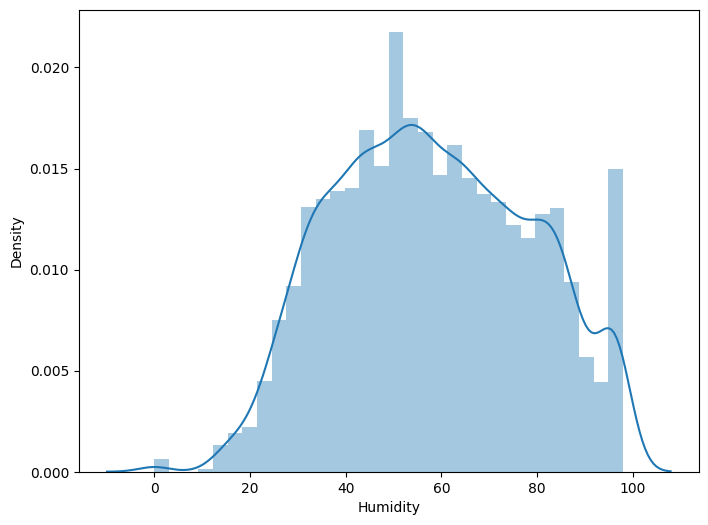

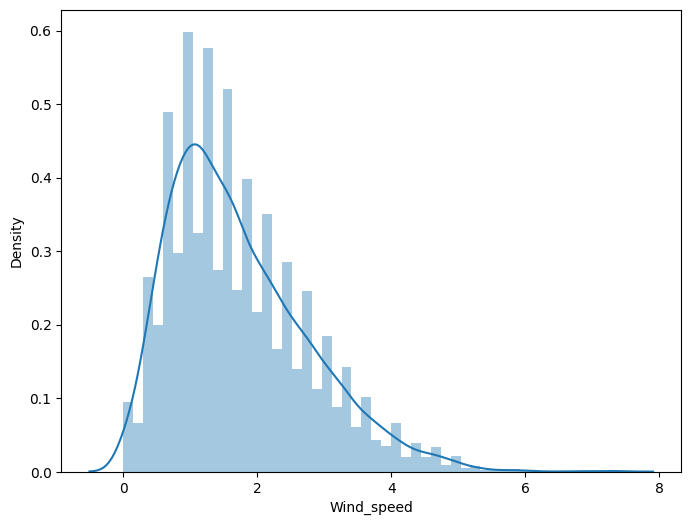

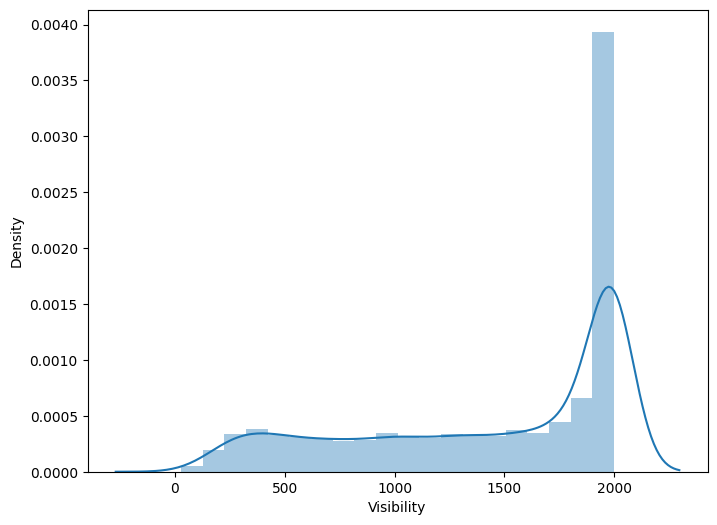

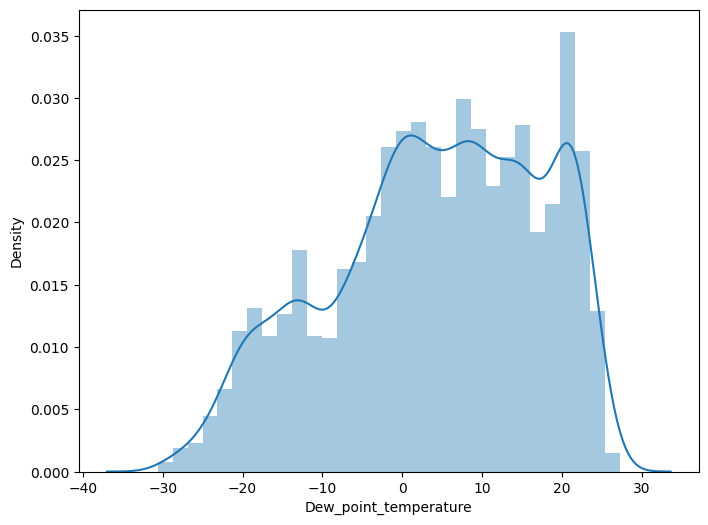

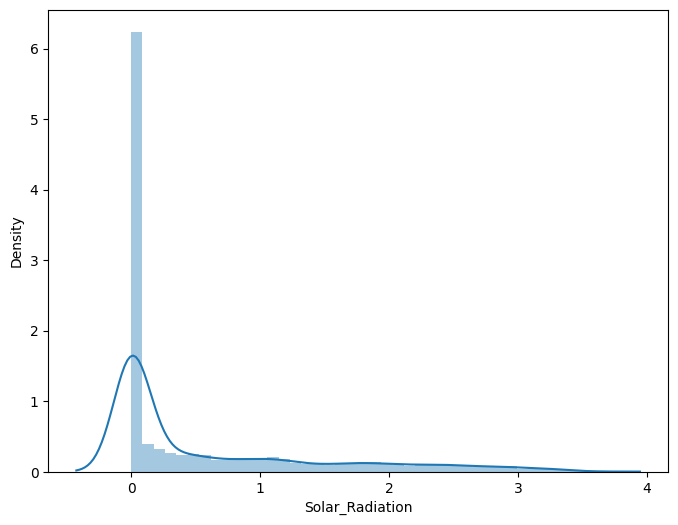

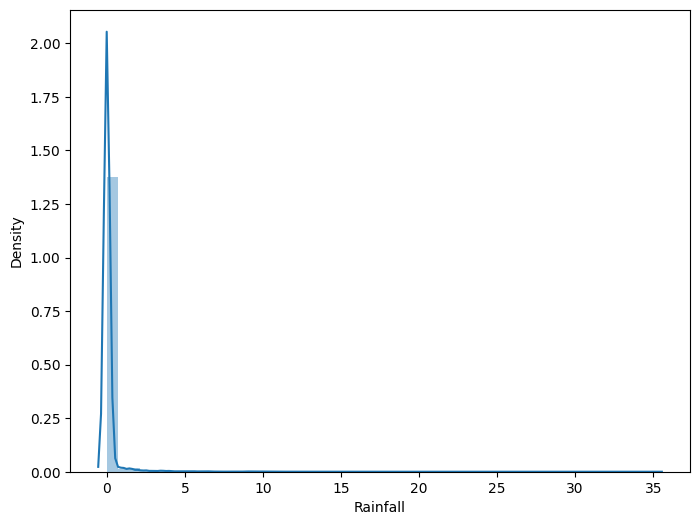

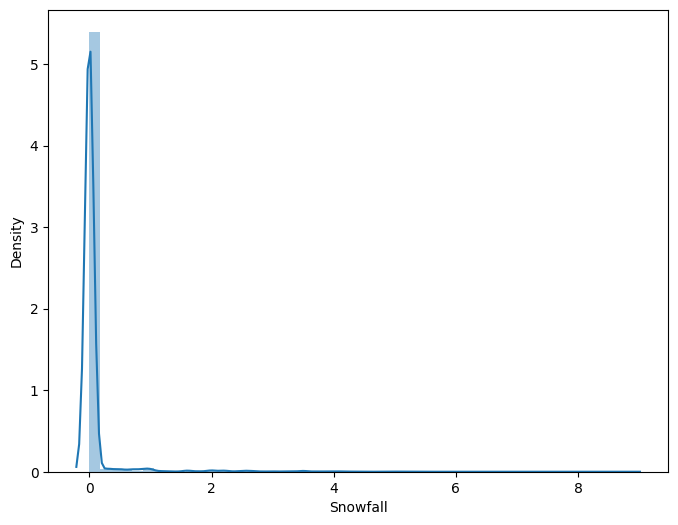

In [38]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(8,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

##Regression plot

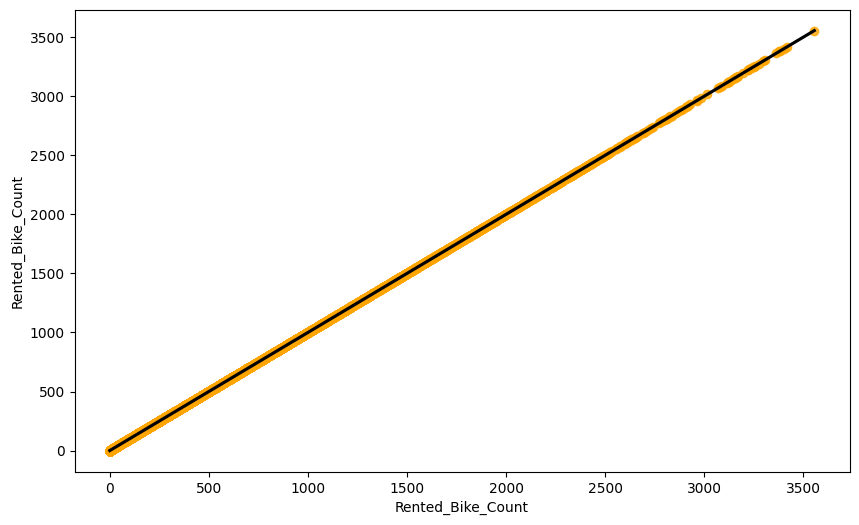

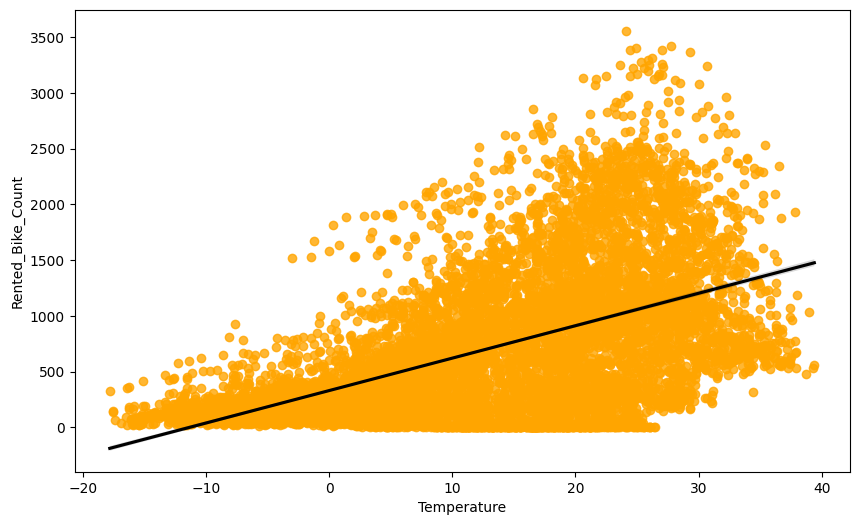

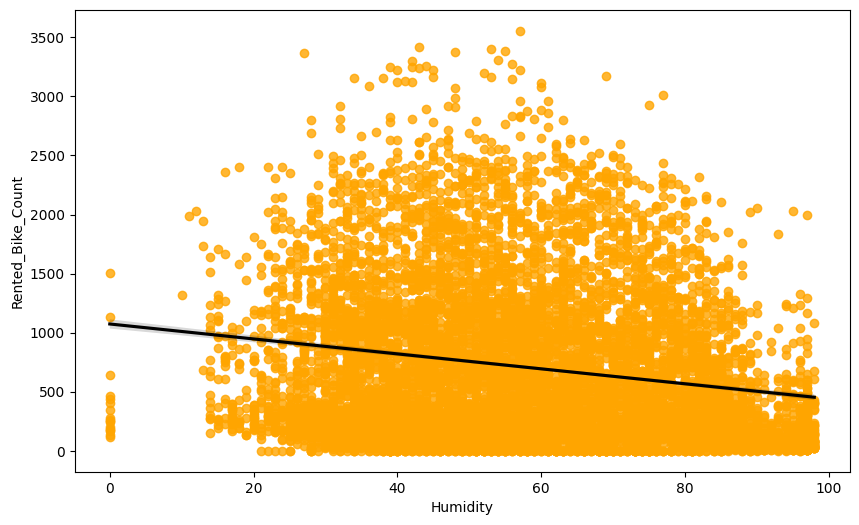

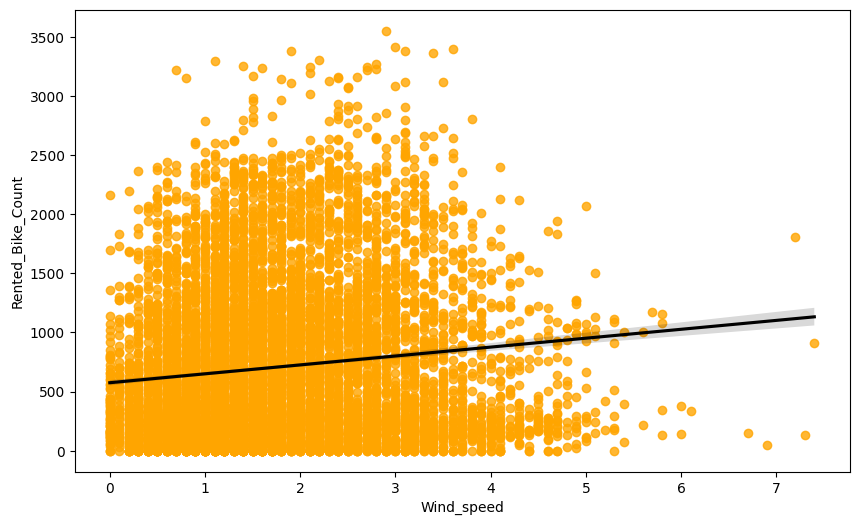

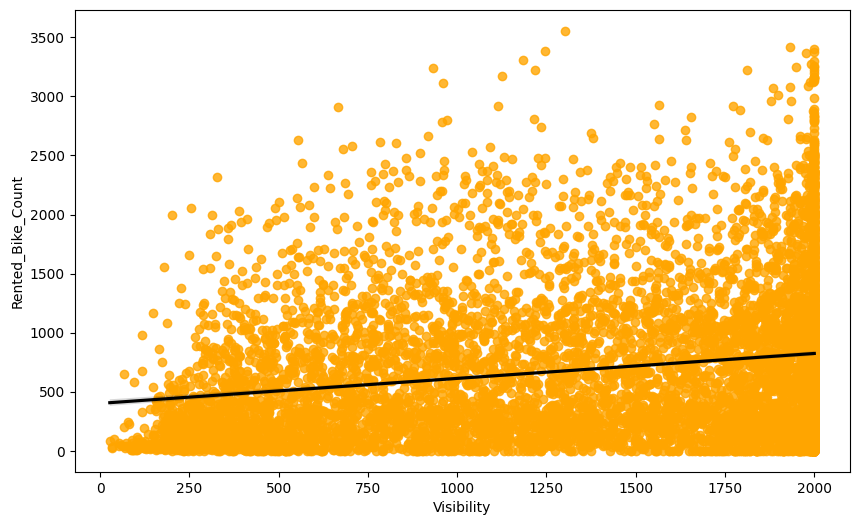

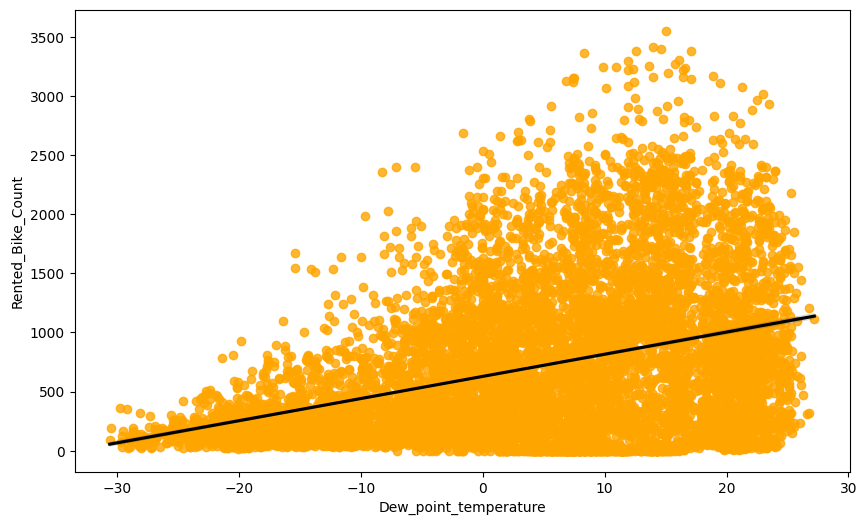

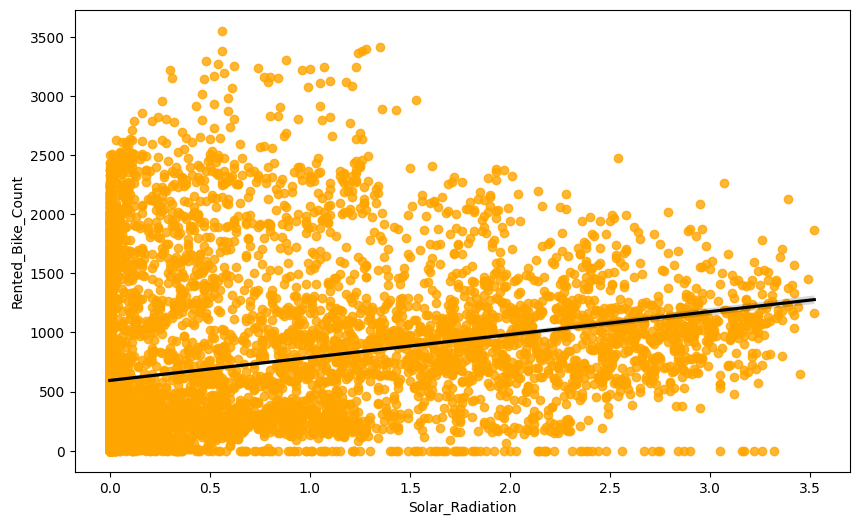

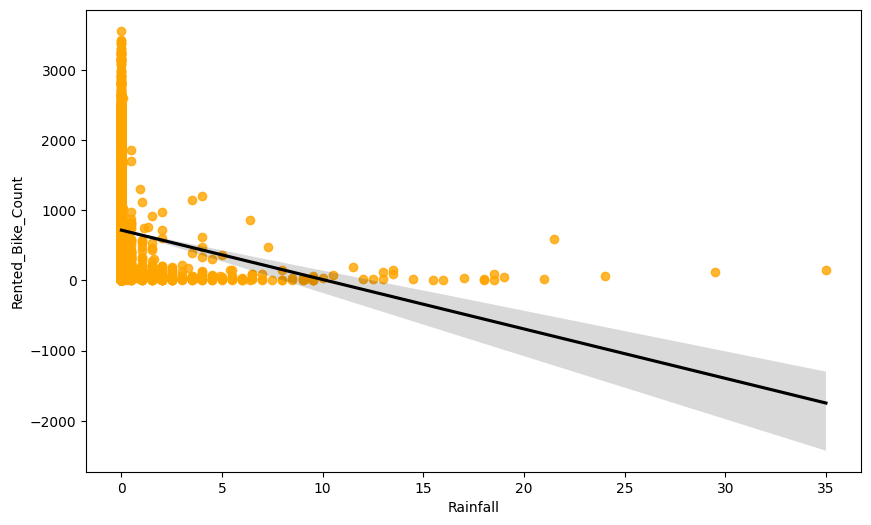

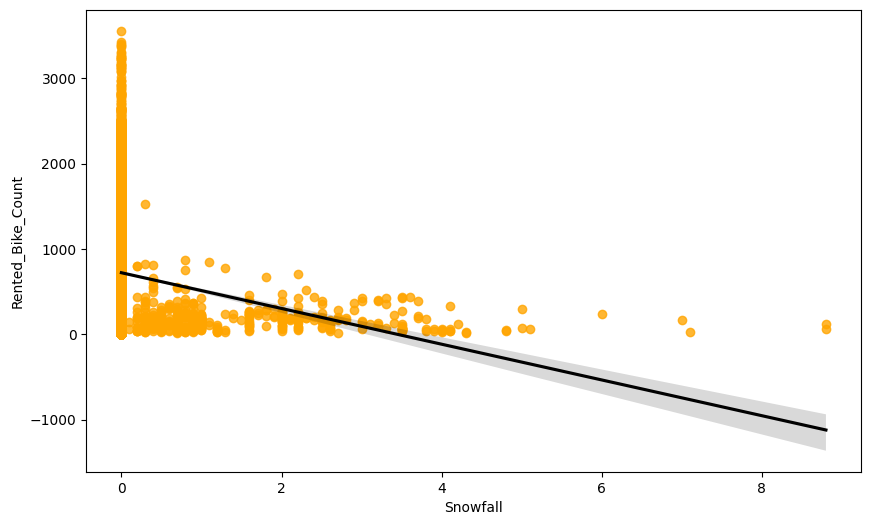

In [39]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color":"black"})

##Data Normalization

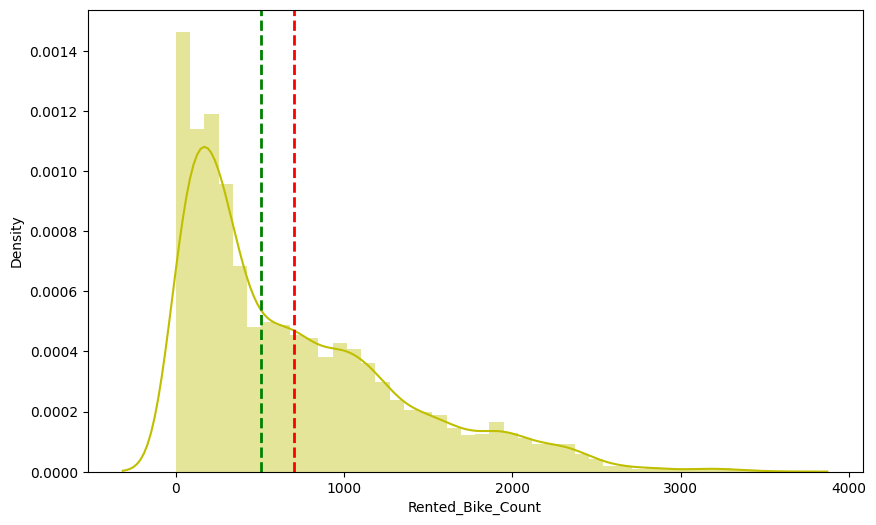

In [40]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_Count'].mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

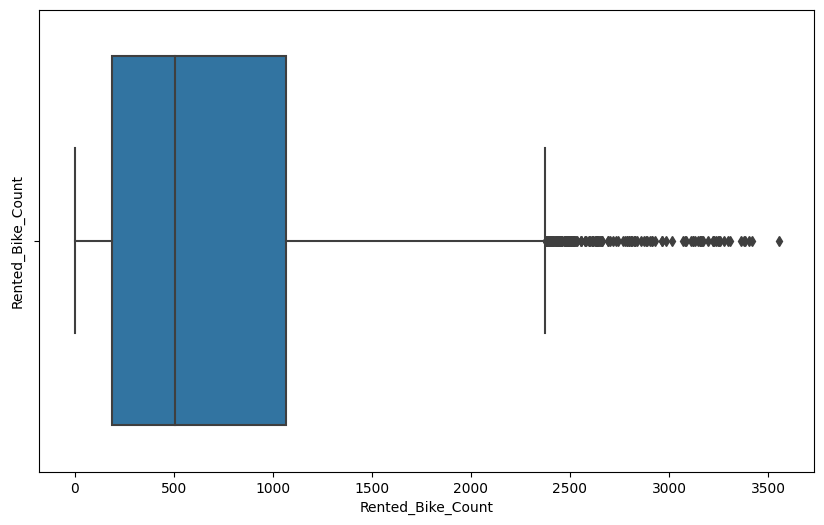

In [41]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

In [42]:
yy= np.sqrt(df['Rented_Bike_Count'])

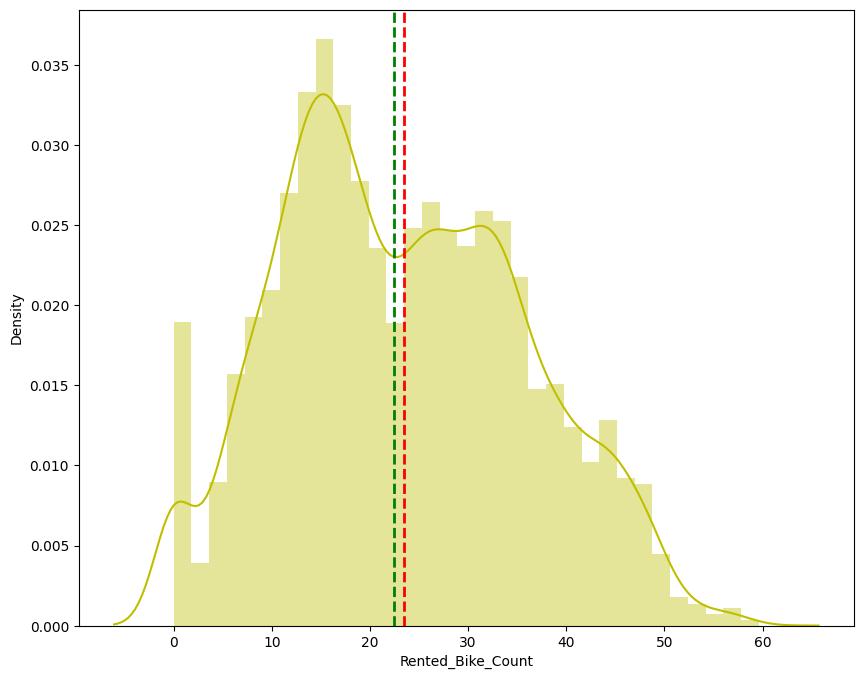

In [43]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='green', linestyle='dashed', linewidth=2)

plt.show()

In [44]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [45]:
# selected_columns = ['Rented_Bike_Count', 'Temperature', 'Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']
# sns.pairplot(df[selected_columns])

<Axes: >

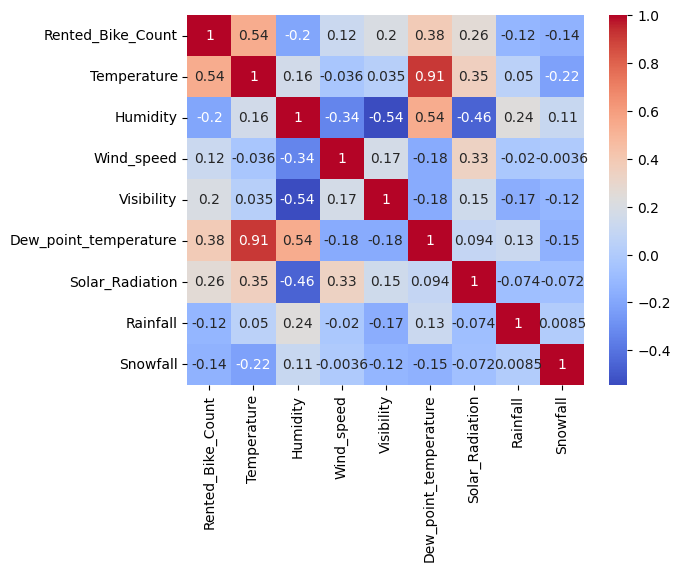

In [46]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [47]:
#drop the Dew point temperature column
df=df.drop(['Dew_point_temperature'],axis=1)

##Hypothesis Testing

In [48]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
import pandas as pd
import scipy.stats as stats


In [49]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'month', 'weekdays_weekend'],
      dtype='object')

#Test 1

In [50]:
rented_bike_count_holiday = df[df['Holiday'] == 1]['Rented_Bike_Count']
rented_bike_count_non_holiday = df[df['Holiday'] == 0]['Rented_Bike_Count']


In [51]:
# Null hypothesis: There is no significant difference in the average rented bike counts between holidays and non-holidays.
# Alternative hypothesis: There is a significant difference in the average rented bike counts between holidays and non-holidays.


In [52]:
t_statistic, p_value = stats.ttest_ind(rented_bike_count_holiday, rented_bike_count_non_holiday)


In [53]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average rented bike counts between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between holidays and non-holidays.")


Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between holidays and non-holidays.


#Test 2

In [54]:
seasons = df['Seasons'].unique()  # Get unique season values
temperature_groups = [df[df['Seasons'] == season]['Temperature'] for season in seasons]


In [55]:
# Null hypothesis: There is no significant difference in the average temperature between the different seasons.
# Alternative hypothesis: There is a significant difference in the average temperature between the different seasons.


In [56]:
f_statistic, p_value = stats.f_oneway(*temperature_groups)


In [57]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average temperature between the different seasons.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average temperature between the different seasons.")


Reject the null hypothesis. There is a significant difference in the average temperature between the different seasons.


#Test 3

In [58]:
rented_bike_count_weekdays = df[df['weekdays_weekend'] == 'Weekday']['Rented_Bike_Count']
rented_bike_count_weekends = df[df['weekdays_weekend'] == 'Weekend']['Rented_Bike_Count']


In [59]:
# Null hypothesis: There is no significant difference in the average rented bike counts between weekdays and weekends.
# Alternative hypothesis: There is a significant difference in the average rented bike counts between weekdays and weekends.


In [60]:
t_statistic, p_value = stats.ttest_ind(rented_bike_count_weekdays, rented_bike_count_weekends)


In [61]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average rented bike counts between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between weekdays and weekends.")


Fail to reject the null hypothesis. There is no significant difference in the average rented bike counts between weekdays and weekends.


In [62]:
# df["Functioning_Day"] = df["Functioning_Day"].map({"No ":0, "Yes":1})
# df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})

# Create dummy variable

In [63]:
#Assign all catagoriacla features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

##One hot encoding

In [64]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Model Training**

##**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [65]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [66]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [68]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [69]:
df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

# **ML model Implementation**

#Simple linear regression model

In [70]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [71]:
#check the score
reg.score(X_train, y_train)

0.7557884266778845

In [72]:
#check the coefficeint
reg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [73]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [74]:
#defining the object
reg = LinearRegression()
reg.fit(X_train, y_train)

#training dataset score
training_score = reg.score(X_train, y_train)

#predicting the value
y_pred = reg.predict(X_test)

#calculating the training accuracy
print("Train score:" ,training_score)

#calculating the MSE
MSE  = mean_squared_error((y_test),(y_pred))
print("Test MSE :" , MSE)

#calculating the testing accuracy
r2 = r2_score((y_test),(y_pred))
print("Test R2 :" ,r2)


Train score: 0.7557884266778845
Test MSE : 36.64474647323366
Test R2 : 0.7680218977120629


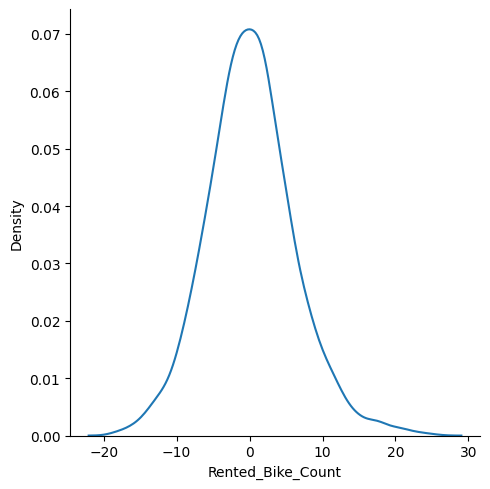

In [75]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')


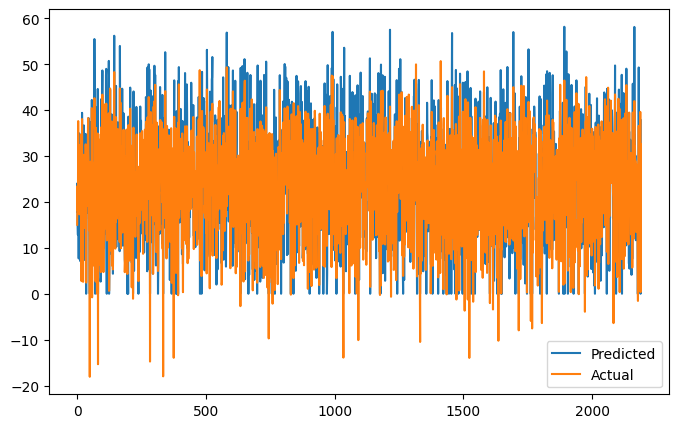

In [76]:
#plot to compare the predicted values against the actual values.
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()


Cross validation and Hyperparameter tuning

In [77]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Create a Linear Regression model (you can replace this with any other regression model)
model = LinearRegression()

# Define hyperparameter search space (you can customize this based on your model)
param_dist = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive':[True, False]}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Train the best model with the entire training dataset
best_model.fit(X_train, y_train)

training_score_val = best_model.score(X_train, y_train)
# Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)

# Calculate evaluation metrics for the test predictions (e.g., mean squared error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score((y_test),(test_predictions))


print("Best Hyperparameters:", best_params)


#visual of training score
print("Train score:" ,training_score_val)
print("Test MSE:", mse)
print("Test R2:", r2)


Best Hyperparameters: {'positive': False, 'fit_intercept': True, 'copy_X': True}
Train score: 0.7557884266778845
Test MSE: 36.64474647323366
Test R2: 0.7680218977120629


#Ridge regression

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets
# 'x_train' and 'x_test' are the results of polynomial regression on PCA-transformed data

# Create a PolynomialFeatures instance (with degree=2 for quadratic features)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

# Create a Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter (regularization strength)

# Fit the Ridge model to the training data
ridge_reg.fit(x_train_poly, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(x_test_poly)

# Calculate R-squared (R2) for the test data
test_r2 = ridge_reg.score(x_test_poly, y_test)

# Calculate R-squared (R2) for the training data
training_r2 = ridge_reg.score(x_train_poly, y_train)

# Calculate Mean Squared Error (MSE) for the test data
mse = mean_squared_error(y_test, y_pred)


print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Test R-squared (R2) Score: 0.88
Training R-squared (R2) Score: 0.91
Mean Squared Error (MSE): 18.88


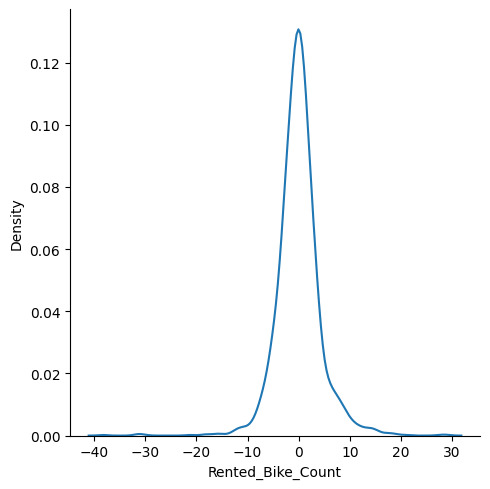

In [79]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

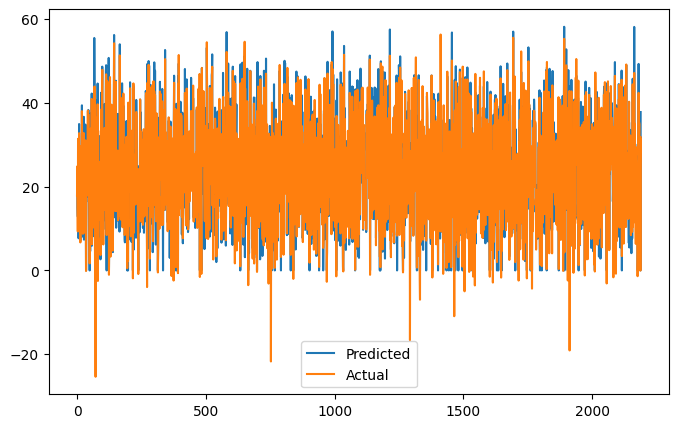

In [80]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np

# Assuming you have 'x' and 'y' as your data and target variable

# Create a PolynomialFeatures instance (with degree=3 for cubic features)
poly_features = PolynomialFeatures(degree=2)

# Create a Ridge regression model
ridge_reg = Ridge()

# Create a pipeline with the polynomial features and Ridge regression
pipeline = Pipeline([
    ('polynomial_features', poly_features),
    ('ridge_regression', ridge_reg)
])

# Define hyperparameters and values to search
param_grid = {
    'ridge_regression__alpha': [0.001, 0.01, 0.1, 1]  # You can adjust the alpha values
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)  # Use the full dataset for cross-validation

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['ridge_regression__alpha']

# Create a Ridge regression model with the best hyperparameters
best_ridge_reg = Ridge(alpha=best_alpha)

# Fit the Ridge model to the training data
best_ridge_reg.fit(X_train, y_train)

# Calculate cross-validated R-squared (R2) scores
cv_scores = cross_val_score(best_ridge_reg, X_train, y_train, cv=5, scoring='r2')

# Calculate R-squared (R2) score on the test data
test_r2 = best_ridge_reg.score(X_test, y_test)

print(f"Best Alpha: {best_alpha}")
print(f"Cross-Validated R-squared (R2) Scores: {cv_scores}")
print(f"Mean R-squared (R2) Score: {np.mean(cv_scores):.2f}")
print(f"Training R-squared (R2) Score: {best_ridge_reg.score(X_train, y_train):.2f}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")


Best Alpha: 1
Cross-Validated R-squared (R2) Scores: [0.74712598 0.75916266 0.75436029 0.74489104 0.74651545]
Mean R-squared (R2) Score: 0.75
Training R-squared (R2) Score: 0.76
Test R-squared (R2) Score: 0.77


#Lasso Regression model

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets
# 'x_train' and 'x_test' are the results of polynomial regression on PCA-transformed data

# Create a PolynomialFeatures instance (with degree=3 for cubic features)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

# Create a Lasso regression model
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter (regularization strength)

# Fit the Lasso model to the training data
lasso_reg.fit(x_train_poly, y_train)

# Predict on the test data
y_pred = lasso_reg.predict(x_test_poly)

# Calculate R-squared (R2) for the test data
test_r2 = lasso_reg.score(x_test_poly, y_test)

# Calculate R-squared (R2) for the training data
training_r2 = lasso_reg.score(x_train_poly, y_train)

# Calculate Mean Squared Error (MSE) for the test data
mse = mean_squared_error(y_test, y_pred)

print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Training R-squared (R2) Score: {training_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")



Test R-squared (R2) Score: 0.81
Training R-squared (R2) Score: 0.82
Mean Squared Error (MSE): 29.90


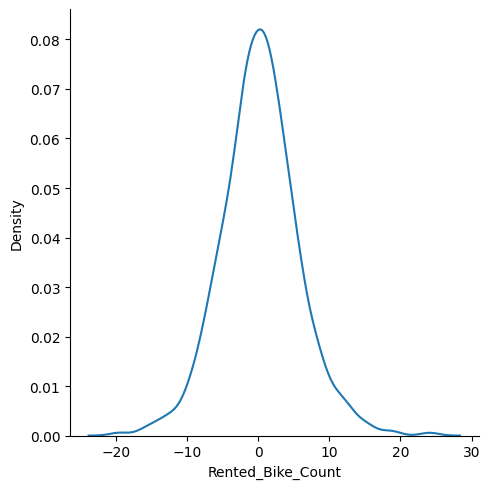

In [83]:
# Visualizing evaluation Metric Score chart
sns.displot(y_pred - y_test,kind ='kde')

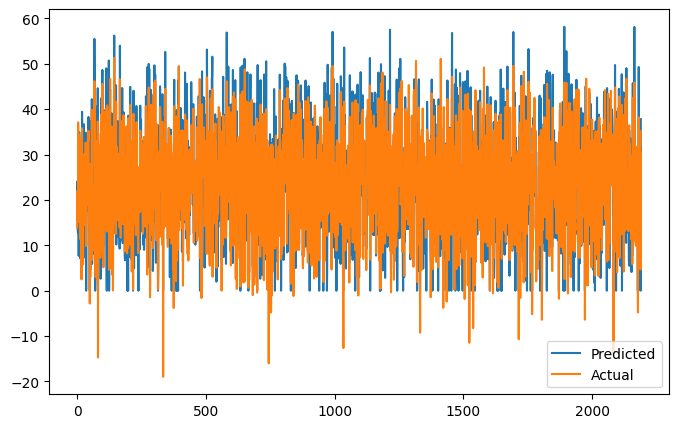

In [84]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.legend(["Predicted","Actual"])
plt.show()


Cross validation and Hyperparameter tuning

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already created the 'x_train', 'x_test', 'y_train', and 'y_test' datasets

# Create a PolynomialFeatures instance (you can adjust the degree)
poly_features = PolynomialFeatures(degree=2)

# Transform the data to include polynomial features
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)

# Define the hyperparameter grid for GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Explore different regularization strengths

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(x_train_poly, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test_poly)
test_r2 = best_model.score(x_test_poly, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test R-squared (R2) Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Best Hyperparameters: {'alpha': 0.01}
Test R-squared (R2) Score: 0.87
Mean Squared Error (MSE): 21.16


#Elastic net Regression model

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Linear Regression model
ElasticNet_model = ElasticNet(alpha=1.0)

# Train the model using the polynomial features
ElasticNet_model.fit(X_train_poly, y_train)

# Make predictions on the training and test data
train_predictions = ElasticNet_model.predict(X_train_poly)
test_predictions = ElasticNet_model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)


Train MSE: 25.793454583648405
Test MSE: 27.559634675149802
Train R-squared: 0.8310601870857375
Test R-squared: 0.8282035535044621


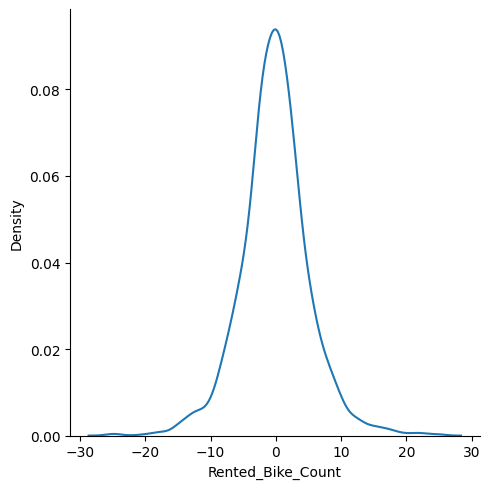

In [87]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions - y_test,kind ='kde')

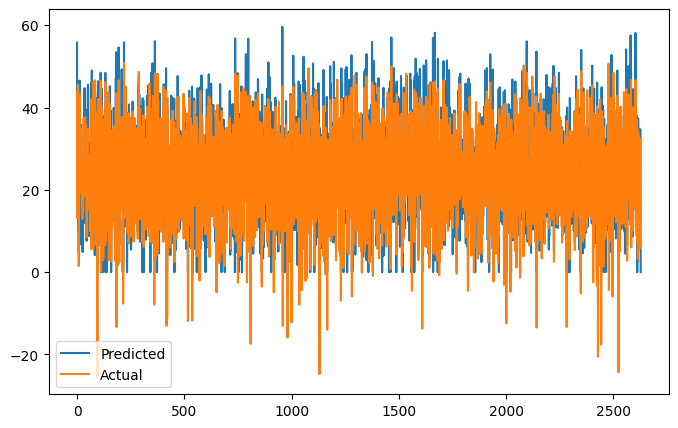

In [88]:
#### 2. Cross- Validation & Hyperparameter Tuning
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions)
plt.legend(["Predicted","Actual"])
plt.show()

Cross validation and Hyperparameter tuning

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge Regression model
ElasticNet_model = ElasticNet()

# Perform Cross-Validation and Hyperparameter Tuning
param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Define the hyperparameter grid

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ElasticNet_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to find the best degree and alpha
grid_search.fit(X_train_poly, y_train)

# Get the best degree and alpha from the GridSearchCV results
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Make predictions on the training and test data
train_predictions = best_model.predict(X_train_poly)
test_predictions = best_model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Best Alpha:", best_alpha)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)



Best Alpha: 0.1
Train MSE: 22.996660345191348
Test MSE: 24.97479514848853
Train R-squared: 0.8493783962217931
Test R-squared: 0.8443164755615176


#Random forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Train the model
rf_model.fit(X_train_poly, y_train)

# Make predictions on the training and test data
train_predictions_rf = rf_model.predict(X_train_poly)
test_predictions_rf = rf_model.predict(X_test_poly)

# Evaluate the model
train_mse_rf = mean_squared_error(y_train, train_predictions_rf)
test_mse_rf = mean_squared_error(y_test, test_predictions_rf)

train_r2_rf = r2_score(y_train, train_predictions_rf)
test_r2_rf = r2_score(y_test, test_predictions_rf)

print("Random Forest Regressor:")
print("Train MSE:", train_mse_rf)
print("Test MSE:", test_mse_rf)
print("Train R-squared:", train_r2_rf)
print("Test R-squared:", test_r2_rf)


Random Forest Regressor:
Train MSE: 2.6562218532711936
Test MSE: 16.22045774904356
Train R-squared: 0.9826025001228456
Test R-squared: 0.8988877380029513


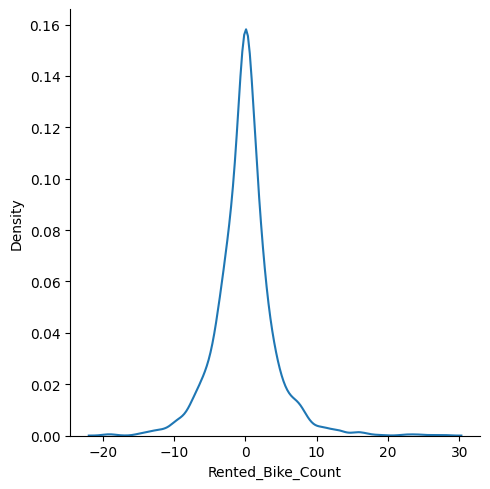

In [91]:
# Visualizing evaluation Metric Score chart
sns.displot(test_predictions_rf - y_test,kind ='kde')

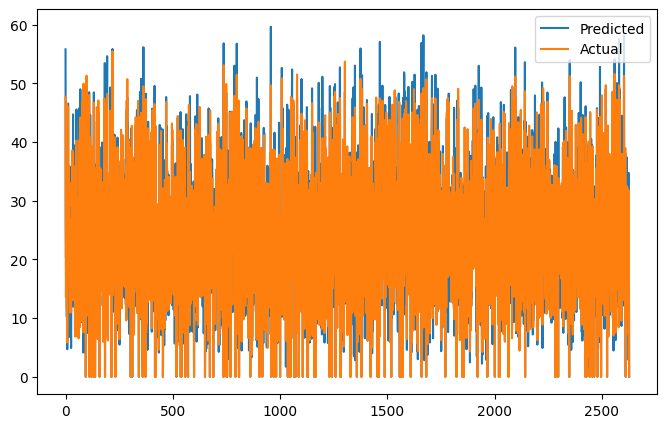

In [92]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_test))
plt.plot(test_predictions_rf)
plt.legend(["Predicted","Actual"])
plt.show()

Cross validation and Hyper parameter tuning

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Define scoring functions
scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score)}

# Train the model
rf_model.fit(X_train_poly, y_train)

# Make predictions on the test data
test_predictions_rf = rf_model.predict(X_test_poly)

# Calculate Test MSE and Test R-squared
test_mse_rf = mean_squared_error(y_test, test_predictions_rf)
test_r2_rf = r2_score(y_test, test_predictions_rf)

# Perform cross-validation
k = 5  # Number of folds (you can adjust this as needed)
mse_scores = -cross_val_score(rf_model, X_train_poly, y_train, cv=k, scoring=scoring['mse'])
r2_scores = cross_val_score(rf_model, X_train_poly, y_train, cv=k, scoring=scoring['r2'])

# Calculate the mean and standard deviation of MSE and R-squared
mean_mse = np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

# Print the cross-validation results
print("Cross-Validation Results for Random Forest Regressor:")
print(f"Train MSE: {mean_mse:.2f} ")
print(f"Train R-squared: {mean_r2:.2f} ")
print(f"Test MSE: {test_mse_rf:.2f}")
print(f"Test R-squared: {test_r2_rf:.2f}")


Cross-Validation Results for Random Forest Regressor:
Train MSE: -18.06 
Train R-squared: 0.88 
Test MSE: 16.22
Test R-squared: 0.90
